In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from sympy import diff, symbols

In [2]:
a = 1.5
b = 3.18
tol = 10**-3
y = lambda x:a*x**3 + b*a*x**2 - a*x - b*a
dif = lambda x:4.5*x**2 + 9.54*x - 1.5

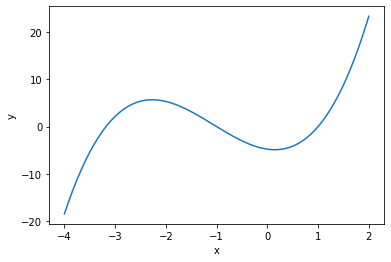

In [3]:
fig = plt.subplots()
x = np.linspace(-4, 2, 300)
plt.plot(x, y(x))
plt.xlabel('x') 
plt.ylabel('y') 
  
plt.show()

In [4]:
x = symbols('x')
print("f`(x) = ", diff(a*x**3 + b*a*x**2 - a*x - b*a))
extr1 = (-9.54-(9.54**2-4*4.5*-1.5)**(1/2))/(2*4.5)
extr2 = (-9.54+(9.54**2-4*4.5*-1.5)**(1/2))/(2*4.5)

f`(x) =  4.5*x**2 + 9.54*x - 1.5


Из графика видно, что корни уравнения лежат в промежутке X∈(-4;2)
f(-4.18)*f(extr1)<0 => X1∈(-4.18;extr1) Найдем X1, используя метод простых итераций
f(-2.68)*f(-0.5)<0 => X2∈(-2.68;-0.5)  Найдем X1, используя метод хорд
f(extr2)*f(2)<0   => X3∈(extr2;2)   Найдем X1, используя метод Ньютона

Метод итераций X1∈(-4.18;extr1)

In [5]:
x1 = -4.18
x2 = extr1
y1 = y(-4.18)
y2 = y(extr1)
noit = 1
arrx = [noit]
arry = [x1]
k = (y2-y1)/(x2-x1)

In [6]:
def root():
    r = -y1*(x2-x1)/(y2-y1)+x1
    return r

In [7]:
x0=root()
y0=y(root())
l=y0-k*x0

In [8]:
def rootnew():
    r = -l/k
    return r  

In [9]:
while y(rootnew()+tol)*y(rootnew()-tol)>0:
  x0=rootnew()
  y0=y(rootnew())
  l=y0-k*x0
  noit = noit+1
  arrx.append(noit)
  arry.append(x0)
print(rootnew())
print(noit)

-3.1797411810307734
5


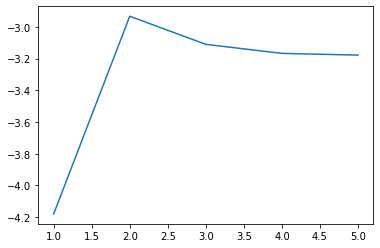

In [10]:
np.hstack((arrx, arry))
plt.plot(arrx, arry) 
plt.show()

Метод хорд X2∈(-2.68;-0.5)

In [11]:
x1 = -2.68
x2 = -0.5
y1 = y(-2.68)
y2 = y(-0.5)
arrx = []
arry = []
noit = 0

In [12]:
def rootchord():
    r = -y1*(x2-x1)/(y2-y1)+x1
    return r

In [13]:
while y(rootchord()+tol)*y(rootchord()-tol)>0:
    r=rootchord()
    if y1*r<0:
        y2=y(r)
        x2=r
    else:
        y2*r<0
        y1=y(r)
        x1=r
    noit = noit+1
    arrx.append(noit)
    arry.append(r)
    rootchord()
    
print(rootchord())
print(noit)

-1.000776082313331
5


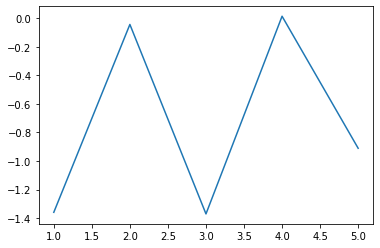

In [14]:
np.hstack((arrx, arry))
plt.plot(arrx, arry) 
plt.show()

Метод Ньютона X3∈(extr2;2)

In [15]:
x=2
noit=0
arrx = [noit]
arry = [x]
arrx.append(noit)
arry.append(x)
while y(x+tol)*y(x-tol)>0:
    x=x-y(x)/dif(x)
    noit=noit+1
    arrx.append(noit)
    arry.append(x)
print(x)
print(noit)

1.0000054947277626
4


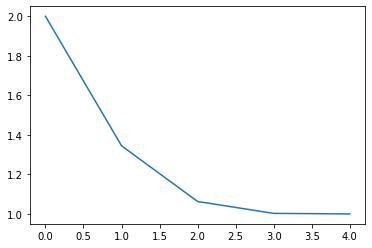

In [16]:
np.hstack((arrx, arry))
plt.plot(arrx, arry) 
plt.show()